# Selenium
* 브라우저를 직접 실행하여 자동화하고 브라우저 상에 있는 데이터를 수집
* 웹 테스트 자동화

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

* 'webdriver' : 파이썬과 브라우저를 연결하기 위한 객체
* 'Service' : [최신 버전] 어떤 브라우저를 사용하게 할 건지 선택
* 'ChromeDriverManager' : [최신 버전]Chrome을 사용하기 위한 드라이버 설정

In [3]:
def get_chrome_driver():
    # 1. 크롬 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
          
    # 2. driver 생성하기
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()),
        options=chrome_options
    )
    
    return driver

In [8]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


In [9]:
driver.get("https://www.naver.com")

In [10]:
driver.find_element(By.CSS_SELECTOR, "#query").clear()
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("바보양")

In [11]:
driver.set_window_size(800, 800) # 윈도우 사이즈 조절

In [12]:
# 스크롤 위치 조절
driver.execute_script("window.scrollTo(50, 200);")

In [13]:
# 테스트 브라우저 종료
driver.quit()

In [14]:
# 셀레니움으로 네이버 뉴스기사 크롤링

In [15]:
page = 2
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
url

'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page=2'

In [16]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


In [17]:
driver.get(url)

In [18]:
articles = driver.find_elements(By.CSS_SELECTOR, "#section_body li")
len(articles)

20

In [19]:
# 첫 번째 기사만 확인
articles[0].text

'"집안 어디서나 끊김 없이"…LG유플러스, \'기가 와이파이6\' 업그레이드\n이웃집 무선공유기와 혼간섭 피하는 채널자동전환 등 신기능 이용 가능 LG유플러스가 …\n더팩트1시간전'

In [20]:
articles[0].find_element(
    By.CSS_SELECTOR,
"dt:not(.photo) > a"
).text

'"집안 어디서나 끊김 없이"…LG유플러스, \'기가 와이파이6\' 업그레이드'

In [21]:
article_list = []

for article in articles:
    title = article.find_element(
        By.CSS_SELECTOR,
        "dt:not(.photo) > a"
    
    ).text
    
    article_list.append(title)
article_list

['"집안 어디서나 끊김 없이"…LG유플러스, \'기가 와이파이6\' 업그레이드',
 '삼성에 퀄컴 뺏기고, 엔비디아 찾아온 TSMC… 파운드리 전쟁 치열',
 '티맵서 내비·킥보드·주차까지 OK..."종합 모빌리티 플랫폼 도약"',
 '[코리아스페이스포럼2021]"스타트업 빠진 \'한국판 뉴스페이스\'…창의성·도전정신 가진 창업가 양성해야"',
 '올리패스 “변이 대응 가능한 코로나19 치료제 개발 중”',
 '반도체 제조기술로 고성능 ‘수소연료전지’ 만든다',
 '국내 첫 \'돈 버는 게임\'에 14만명 몰렸다…"기존 게임 질려서"',
 "최태원 회장 역점사업 '소통 플랫폼' 흥행 조짐...한달 새 300건 이상 제안",
 '“더 이상의 경계는 없다”…삼성, IM·CE부문 통합 의미는',
 '“곧 40도” 대신 ”이만큼 죽을 수도”…미, 폭염에 이름·등급 붙인다',
 '예술 작품, 이젠 VR기기로 즐긴다…메타, 메타버스 대중화 도전',
 '[이젠, 우주]韓 첫 소행성 탐사 ‘시작’만 남았다…천문연의 자신감',
 "가전과 한살림 차린 갤럭시폰…'제2의 비스포크 성공' 시너지 노린다",
 '보로노이 “기술이전 금액 2조원 돌파…매년 2건 계약 목표”',
 '삼성전자, 한종희·정현호·경계현 체제로 대전환',
 'KT스카이라이프 알뜰폰, 1년만 가입자 10만 돌파',
 'LCD TV 패널가, 내년 3월까지 하락세',
 '가전·모바일 부문 합친 삼성전자, 스마트홈 생태계 확대 노린다',
 'OTT 전성시대…"콘텐츠 잘하는 건 기본, 플랫폼 잘 돼야 뜬다"',
 '가온셀, 사우디 수소전지회사 지분 20% 확보']

In [22]:
driver.quit()

In [23]:
article_list=[]

def get_article(page):
    driver = get_chrome_driver()
    url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
    driver.get(url)
    articles = driver.find_elements(
    By.CSS_SELECTOR,
    "#section_body li"
    )
    
    for article in articles:
        title = article.find_element(
            By.CSS_SELECTOR,
            "dt:not(.photo) > a"
        ).text
        article_list.append(title)
    
    print("Crawling : {}".format(page))
    
    driver.quit()

In [19]:
%%time
for page in range(1, 5):
    get_article(page)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/yea971213/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome


Crawling : 1


Driver [/Users/yea971213/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome


Crawling : 2


Driver [/Users/yea971213/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome


Crawling : 3


Driver [/Users/yea971213/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


Crawling : 4
CPU times: user 290 ms, sys: 137 ms, total: 427 ms
Wall time: 30.5 s


In [ ]:
# 크롤링 마무리

# thread를 이용해서 크롤링 하기
* `thread`를 활용하는 이유 : IDLE을 최대한 줄이기 위해서 사용한다.
* 하나의 작업만을 하는 것이 아닌, 동시에 여러 작업을 하기 위함

대략적으로 40% 시간이 절감된다.

In [24]:
import threading

In [25]:
article_list = []

for page in range(1, 5):
    th = threading.Thread(target=get_article, args=(page, ))
    th.start()









====== WebDriver manager ======
====== WebDriver manager ======
====== WebDriver manager ======
====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
Exception in thread Thread-8:
Traceback (most recent

Crawling : 3


Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/l6/zf_y8js55058y519pbd3k9480000gn/T/ipykernel_14311/2302991572.py", line 13, in get_article
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/site-packages/selenium/webdriver/remote/webelement.py", line 735, in find_element
    return self._execute(Command.FIND_CHILD_ELEMENT,
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/site-packages/selenium/webdriver/remote/webelement.py", line 710, in _execute
    return self._parent.execute(command, params)
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/site-packages/selenium/webdriver/remote/webdriver.py", line 424, in execute
    self.error_handler.check_response(response)
  File "/Users/kimhansaem/op

Crawling : 4


In [26]:
page = 1
(page, )

(1,)

In [27]:
import time
sec = 0
while len(article_list) < 80:
    # 1초에 한번씩 멈추기
    time.sleep(1)
    sec += 1
    print(sec, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 

KeyboardInterrupt: 

# 셀레니움을 이용한 이미지 크롤링
* youtube 영상을 이미지로 크롤링
* 특정 영역을 자르기
    * pillow : 파이썬에서 이미지를 전처리 해주는 대표적인 패키지
    * 최근에는 opencv가 굉장히 유행중!

In [28]:
import requests # 동영상 다운로드
import time
import pandas as pd
from PIL import Image as pil

In [29]:
url = "https://www.youtube.com/watch?v=yFZh-Wqi7RI&t=120s"
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


In [30]:
driver.get(url)

In [31]:
driver.get(url)
driver.save_screenshot("my_screenshot.png")
driver.quit()

(2400, 1270)


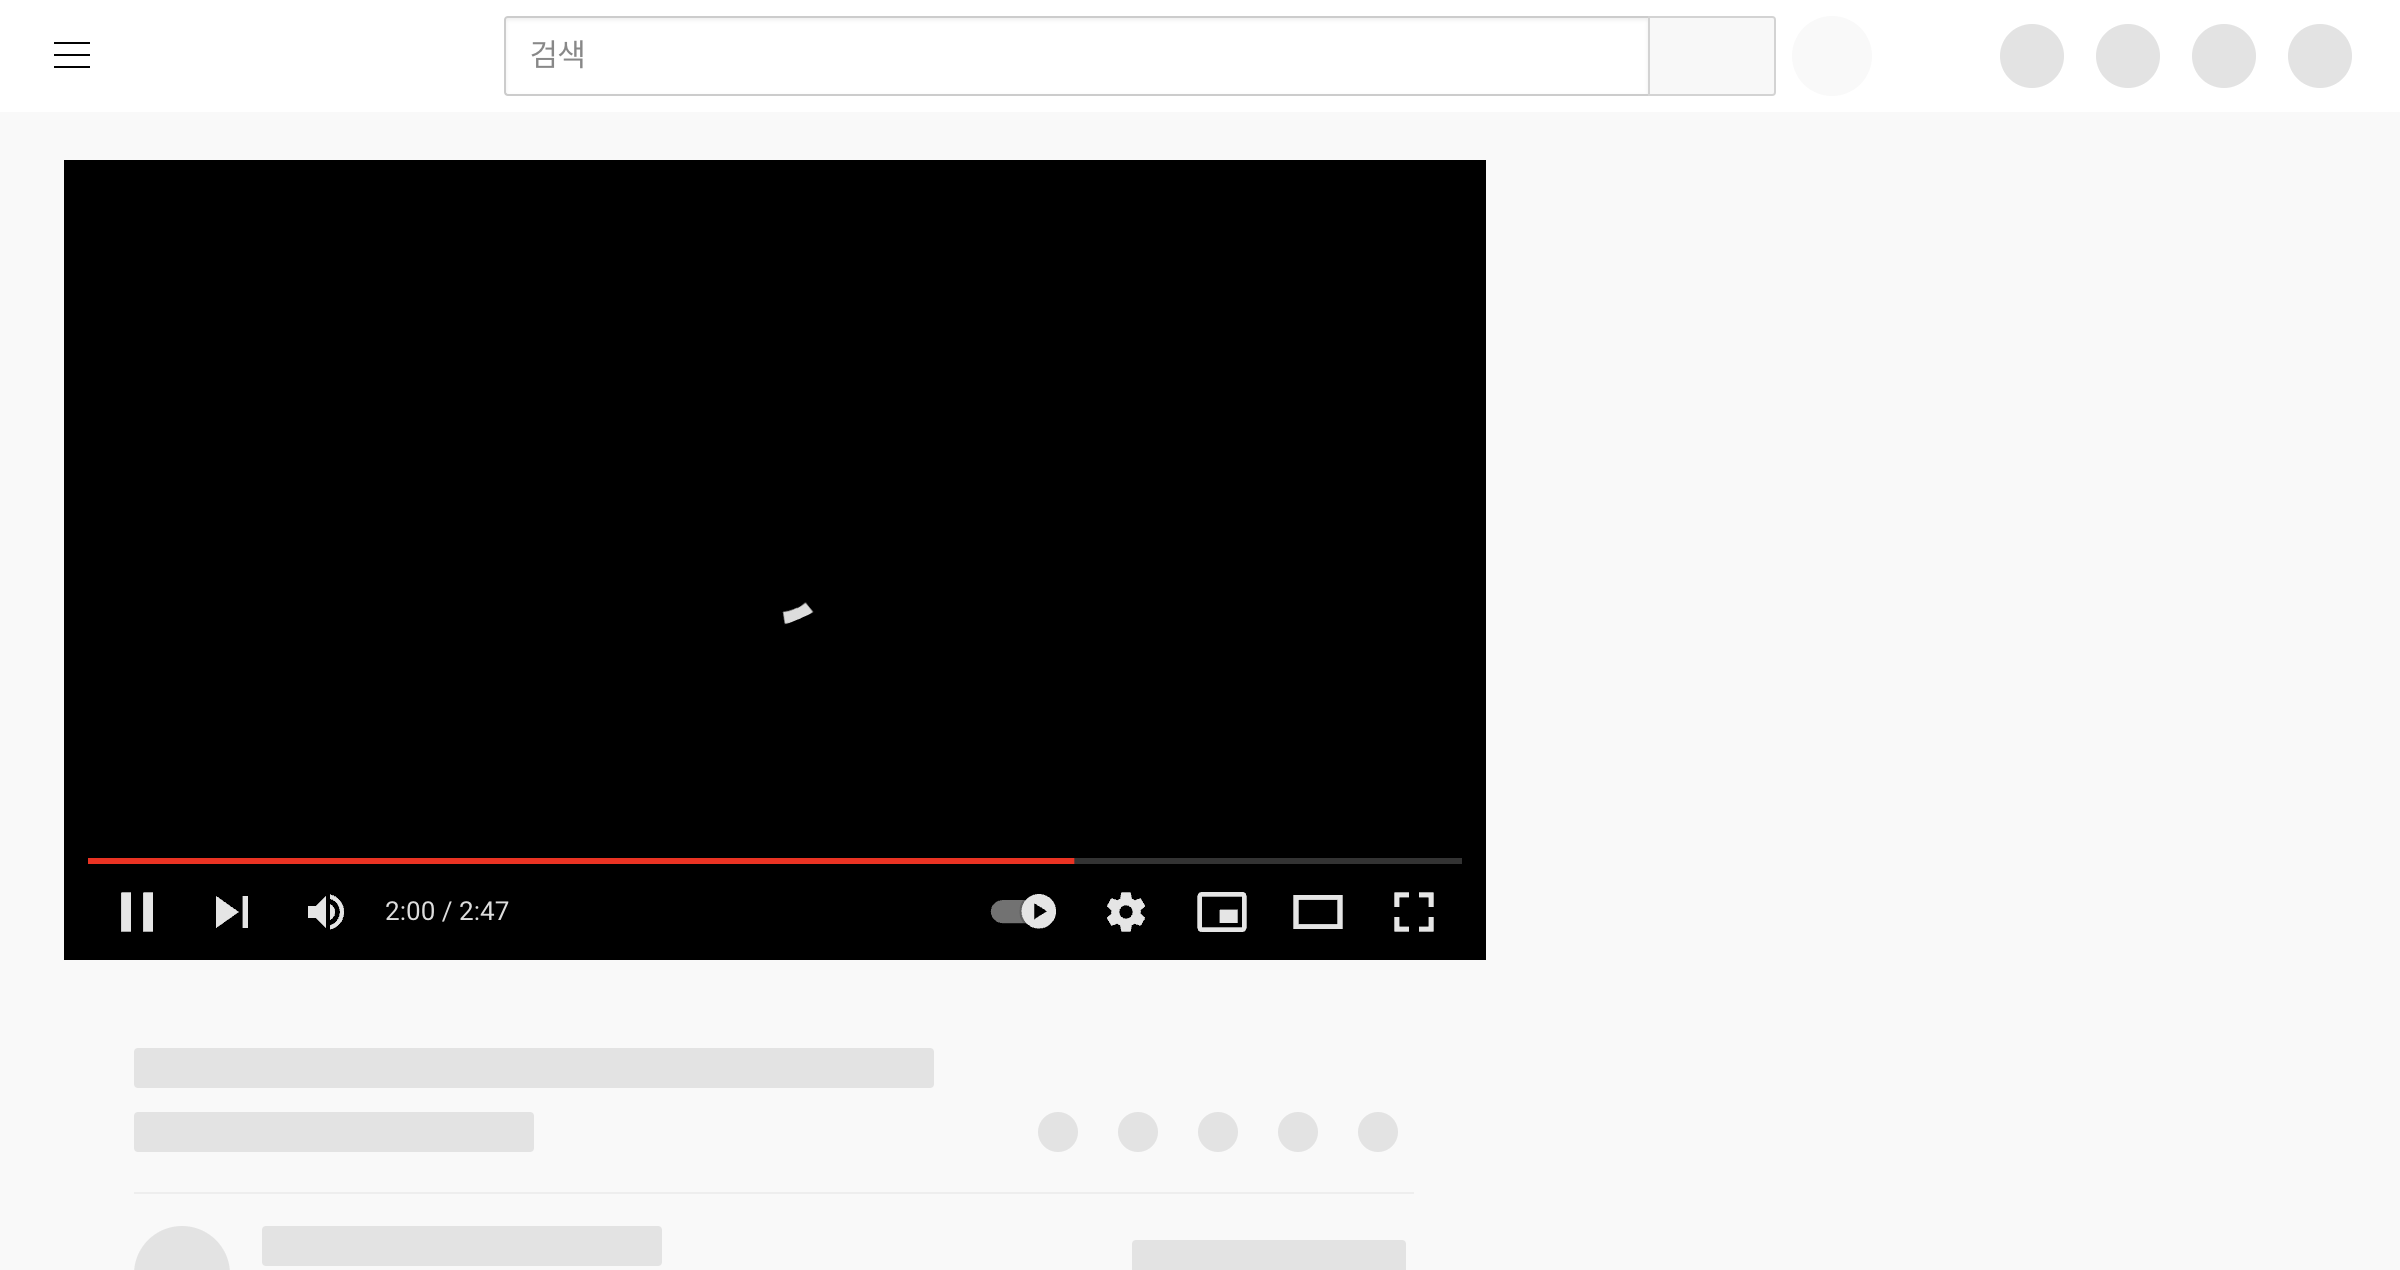

In [32]:
pil_img = pil.open("my_screenshot.png")
print(pil_img.size)
pil_img

In [33]:
driver = get_chrome_driver()
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


In [35]:
movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player"
)

movie_player

<selenium.webdriver.remote.webelement.WebElement (session="4f3e978fd1b99cf1820550cedf43f9af", element="2bcd7ce0-0bec-4a9d-aba2-0a4786e6cb50")>

In [36]:
# element의 위치 찾기
location = movie_player.location
location

{'x': 24, 'y': 80}

In [37]:
# element의 크기 구하기
size = movie_player.size
size

{'height': 399, 'width': 710}

In [38]:
driver.save_screenshot("spider_man_screenshot.png")

True

In [40]:
driver.quit()

In [40]:
# 새로 캡쳐한 이미지에서 잘라낼 범위를 계산
# left, top, right, bottom
# mac의 retina display 에서만... *2
left = location['x'] * 2
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2

area = (left, top, right, bottom)
area

(48, 160, 1468, 958)

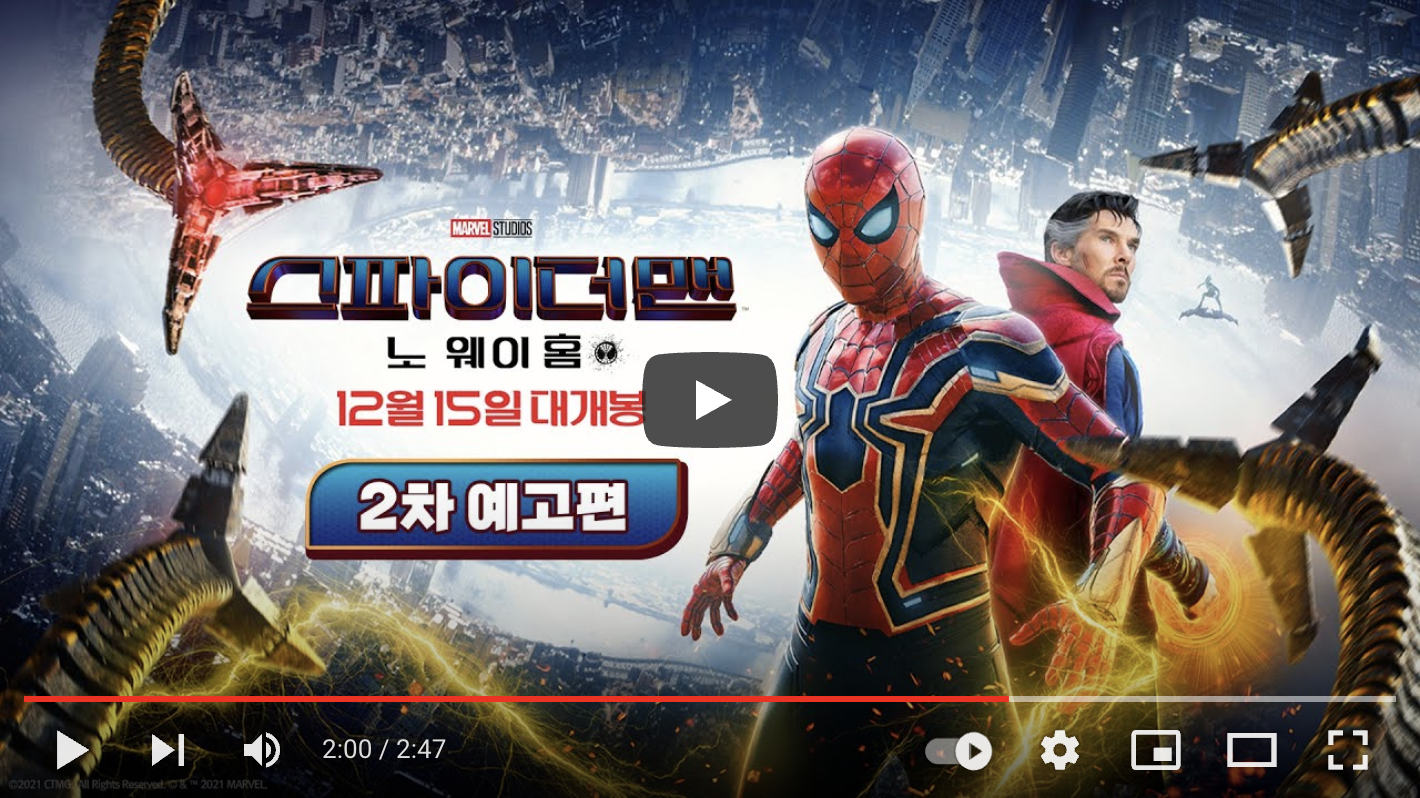

In [41]:
pil_img = pil.open("spider_man_screenshot.png")
croped_image = pil_img.crop(area)
croped_image

In [42]:
croped_image.save("croped_spiderman.png")

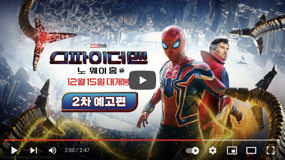

In [43]:
croped_image.thumbnail((320, 160))
croped_image

# User-Agent 부여하기
* fake_useragent

In [44]:
# selenium에서 user_agent 확인하기
driver = get_chrome_driver()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36


In [45]:
# fake_useragent 활용하기
from fake_useragent import UserAgent

UserAgent().chrome

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/site-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/Users/kimhansaem/opt/anaconda3/lib/python3.9/site-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

In [46]:
# useragent를 임의로 설정할 수 있는 driver 생성 함수
def get_chrome_driver_useragent():
    agent = UserAgent().chrome
    chrome_options = webdriver.ChromeOptions()
    
    chrome_options.add_argument("user-agent={}".format(agent))
    
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()),
        options = chrome_options
    
    )
    
    return driver

In [47]:
driver = get_chrome_driver_useragent()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36


# Headless 설정하기
- `Mac`, 'Windows'는 'GUI 환경'
- `리눅스(ec2) 환경은 CLI 환경`

headless 설정을 하면 눈에는 보이지 않지만 메모리(RAM) 내에서 돌아가는 브라우저를 띄울 수 있다.

In [48]:
def get_chrome_driver_headless():
    agent = UserAgent().chrome
    chrome_options = webdriver.ChromeOptions()
    
    # 창은 안뜨고 메모리에서만 돌아가는 브라우저 만들기.
    chrome_options.add_argument("headless")
    
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()),
        options = chrome_options
    
    )
    
    return driver

In [49]:
driver = get_chrome_driver_headless()
driver.get("https://www.naver.com")
title = driver.title
print(title)
driver.quit()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


NAVER


셀레니움을 이용한 크롤링은 'GUI' 환경에서 모든 테스트를 마치고 headless 설정만 해서 CLI 환경에서 돌린다.

# 동영상 다운로드

In [50]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [51]:
url = "https://www.youtube.com/watch?v=yFZh-Wqi7RI"

# www. 을 ss로 바꾸면 유투브 비디오를 다운로드 할 수 있는 페이지가
download_url = "https://ssyoutube.com/watch?v=yFZh-Wqi7RI"

In [52]:
driver = get_chrome_driver()
driver.get(download_url)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/kimhansaem/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache


In [53]:
dowmload_button = driver.find_element(
    By.CSS_SELECTOR,
    "#sf_result > div.media-result > div > div.thumb-box.thumb-272 > a > img")

title = download_button.get_attribute("download")
download_source = download_button.get_attribute("href")

title, download_source

NameError: name 'download_button' is not defined

In [54]:
size = download(title, download_source)
driver.quit()
print("{} Mb".format(round(size/1024/1024,2)))

NameError: name 'download_source' is not defined